Useful 
   * http://pandas.pydata.org/pandas-docs/stable/10min.html
   * http://machinelearningmastery.com/quick-and-dirty-data-analysis-with-pandas/
   * http://bconnelly.net/2013/10/summarizing-data-in-python-with-pandas/ for understanding groupby

Have used web page at https://github.com/cran/DVHmetrics to upload all dvh text files and queried to get desired metrics which are downloaded as a comma seperated text file, rename extension .csv.


For all available structures I export the following metrics


    D2%, D5%, D50%, D95%, D99%, D1cc,  D0.1cc, DMAX, DSD, DHI, V5Gy, V12.5Gy, V20Gy, V30Gy , V40Gy, V50Gy,  V55Gy  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [230]:
AAA_df = pd.read_csv('AAA_metrics.csv')  # import AAA data
Dm_df = pd.read_csv('Dm_metrics.csv')  
#Dw_df = pd.read_csv('Dw_metrics.csv')  # dont analyse for time being

parse patID to get Case

In [231]:
AAA_df['Case'] = AAA_df['patID'].str.split('_').str.get(0)  # get the case ID e.g. case1
AAA_df = AAA_df.drop('patID', 1)                            # drop patID
AAA_df.rename(columns={'observed': 'AAA'}, inplace=True)    # rename 
AAA_df.head()

,AAA,metric,structure,Case
0,70.416875,D2%,GTV,Case1
1,69.936453,D5%,GTV,Case1
2,68.431595,D50%,GTV,Case1
3,65.858142,D95%,GTV,Case1
4,65.005944,D99%,GTV,Case1


In [232]:
Dm_df['Case'] = Dm_df['patID'].str.split('_').str.get(0)
Dm_df = Dm_df.drop('patID', 1)
Dm_df.rename(columns={'observed': 'Dm'}, inplace=True)    # rename 

Check which metrics have I exported

In [213]:
print (AAA_df.Case.unique())
print ("The number of unique patients is " + str(len((AAA_df.Case.unique() ))))
print (AAA_df.metric.unique())
print ("The number of unique metrics is " + str(len((AAA_df.metric.unique() ))))
print (AAA_df.structure.unique())
print ("The number of unique structures is " + str(len((AAA_df.structure.unique() ))))

['Case1' 'Case11' 'Case12' 'Case13' 'Case14' 'Case16' 'Case17' 'Case18'
 'Case22' 'Case23' 'Case25' 'Case30' 'Case31' 'Case32']
The number of unique patients is 14
['D2%' 'D5%' 'D50%' 'D95%' 'D99%' 'D1CC' 'D0.1CC' 'DMAX' 'DSD' 'DHI' 'V5GY'
 'V12.5GY' 'V20GY' 'V30GY' 'V40GY' 'V50GY' 'V55GY']
The number of unique metrics is 17
['GTV' 'Heart' 'Foramen' 'Oesophagus' 'Trachea' 'Bronchial tree'
 'L Brachial plex' 'Rt Brachial plex' 'PTV CHEST' 'Lt_Lung' 'Rt_Lung'
 'Both Lungs-ITV' 'skin' 'ribs' 'R Brachial plex' 'Foramen+3mm'
 'Both Lungs' 'LT Lung' 'BODY' 'Skin-PTV+2cm' 'PTV ring 2-3cm' 'Ribs-PTV'
 'PseudoPTV-ITV' 'CONTRAST']
The number of unique structures is 24


In [175]:
AAA_poss_entries = len(AAA_df.structure.unique()) * len((AAA_df.metric.unique() ))  * len((AAA_df.Case.unique() ))
print("total possible number of entries is " + str(AAA_poss_entries))
print("the actual number of AAA entries is " + str(len(AAA_df)))
print("the actual number of Dm entries is " + str(len(Dm_df)))
#print("the actual number of Dw entries is " + str(len(Dw_df)))

total possible number of entries is 5712
the actual number of AAA entries is 3723
the actual number of Dm entries is 3842


Not all structures were exported in some cases due to the manual process so number of AAA and Dm entries differ. Need to keep only entries which are common

In [227]:
AAA_df_groupby_structure = AAA_df[AAA_df['metric'] == 'D50%'].groupby([ 'structure'])
#AAA_df_groupby_structure = AAA_df.groupby([ 'structure', 'metric'])
AAA_df_groupby_structure.AAA.count()

structure
BODY                 3
Both Lungs           5
Both Lungs-ITV      12
Bronchial tree      13
CONTRAST             2
Foramen             13
Foramen+3mm         12
GTV                  4
Heart               14
L Brachial plex     15
LT Lung              1
Lt_Lung             13
Oesophagus          14
PTV CHEST           14
PTV ring 2-3cm       8
PseudoPTV-ITV       14
R Brachial plex      7
Ribs-PTV             7
Rt Brachial plex     4
Rt_Lung             14
Skin-PTV+2cm         6
Trachea             13
ribs                10
skin                 1
Name: AAA, dtype: int64

In [228]:
Dm_df_groupby_structure = Dm_df[Dm_df['metric'] == 'D50%'].groupby([ 'structure'])
Dm_df_groupby_structure.Dm.count()

structure
BODY                 4
Both Lungs           5
Both Lungs-ITV      13
Bronchial tree      14
CONTRAST             2
Foramen             13
Foramen+3mm         13
GTV                  4
Heart               14
L Brachial plex     15
LT Lung              1
Lt_Lung             13
Oesophagus          14
PTV CHEST           14
PTV ring 2-3cm       8
PseudoPTV-ITV       14
R Brachial plex      9
Ribs                 1
Ribs-PTV             8
Rt Brachial plex     4
Rt_Lung             14
Skin-PTV+2cm         6
Trachea             14
ribs                 9
Name: Dm, dtype: int64

# Here

Compare dataframs and only keep entries common to both, see http://stackoverflow.com/questions/26921943/pandas-intersection-of-two-data-frames-based-on-column-entries

And http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging

In [206]:
data = pd.merge(AAA_df, Dm_df, how='inner', on=['structure', 'metric', 'Case'])  # merge on common
#data = data[['Case', 'structure','metric','AAA','Dm']]      # rearrange columns

print(len(data))

4896


In [195]:
data.head()

,Case,structure,metric,AAA,Dm
0,Case1,GTV,D2%,70.416875,69.866751
1,Case1,GTV,D5%,69.936453,69.518475
2,Case1,GTV,D50%,68.431595,67.531335
3,Case1,GTV,D95%,65.858142,65.116713
4,Case1,GTV,D99%,65.005944,64.064209


In [178]:
data_groupby_structure = data.groupby(['structure'])
data_groupby_structure.Case.count()

structure
BODY                  51
Both Lungs            85
Both Lungs-ITV       170
Bronchial tree       204
CONTRAST              34
Foramen              204
Foramen+3mm          187
GTV                   68
Heart                221
L Brachial plex      272
LT Lung               17
Lt_Lung              204
Oesophagus           221
PTV CHEST            221
PTV ring 2-3cm       374
PseudoPTV-ITV       1156
R Brachial plex       85
Ribs-PTV             289
Rt Brachial plex      68
Rt_Lung              221
Skin-PTV+2cm         204
Trachea              204
ribs                 136
Name: Case, dtype: int64

Sanity check that data munging has been successful

In [181]:
import random
test_metric = random.choice(data.metric.unique())
test_structure = random.choice(data.structure.unique())
test_case = random.choice(data.Case.unique())

AAA_test =  AAA_df[(AAA_df['metric'] == test_metric) & (AAA_df['structure'] == test_structure) & (AAA_df['Case'] == test_case)]
print(AAA_test.AAA)

Dm_test =  Dm_df[(Dm_df['metric'] == test_metric) & (Dm_df['structure'] == test_structure) & (Dm_df['Case'] == test_case)]
print(Dm_test.Dm)

data_test = data[(data['metric'] == test_metric) & (data['structure'] == test_structure) & (data['Case'] == test_case)]
print(data_test)

1775    17.875
Name: AAA, dtype: float64
1826    18.04
Name: Dm, dtype: float64
        Case structure metric     AAA     Dm
1486  Case22     Heart   DMAX  17.875  18.04


Some strcuture appear more than once per case, e.g. Case31  Skin-PTV+2cm

In [151]:
import random
test_metric = random.choice(data.metric.unique())
test_metric

'D1CC'

In [220]:
#AAA_df_groupby_structure = AAA_df[AAA_df['structure'] == 'PTV CHEST'].groupby([ 'metric', 'structure'])
AAA_df_groupby_structure = AAA_df.groupby([ 'structure', 'metric'])
#AAA_df_groupby_structure.count()

In [23]:
AAA_df.groupby?

And structures

Get info about 1 metric and structure, return an array

In [15]:
AAA_df_D50_Chest =   AAA_df.observed[(AAA_df['metric'] == 'D50%') & (AAA_df['structure'] == 'PTV CHEST')]  # get dmean for PTV

In [18]:
AAA_df_D50_Chest.describe()  # get dmean for PTV

count    14.000000
mean     63.821273
std       2.280658
min      58.717695
25%      62.838605
50%      64.536989
75%      65.574917
max      66.714681
Name: observed, dtype: float64

In [19]:
Dm_df_D50_Chest =   Dm_df.observed[(Dm_df['metric'] == 'D50%') & (Dm_df['structure'] == 'PTV CHEST')]  # get dmean for PTV
Dm_df_D50_Oesophagus =   Dm_df.observed[(Dm_df['metric'] == 'D50%') & (Dm_df['structure'] == 'Oesophagus')]  # get dmean for PTV

Place structures info into a new dataframe

In [20]:
Dm_structures_df = pd.DataFrame({'ChestPTV': Dm_df_D50_Chest.as_matrix(),
                                'Oesophagus': Dm_df_D50_Oesophagus.as_matrix() })

In [21]:
Dm_structures_df.describe()

,ChestPTV,Oesophagus
count,14.000000,14.000000
mean,64.063104,1.268311
std,2.945856,2.692071
min,58.326234,0.162849
25%,63.880134,0.317761
50%,64.794591,0.385124
75%,66.122215,1.021224
max,67.277357,10.533275


Get code for BA plot from http://stackoverflow.com/questions/16399279/bland-altman-plot-in-python

In [135]:
def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    plt.xlabel('Dose (Gy)')
    plt.ylabel('Difference (%)')

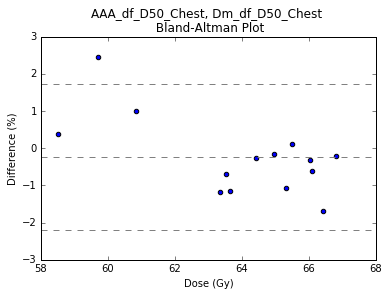

In [139]:
bland_altman_plot(AAA_df_D50_Chest, Dm_df_D50_Chest)
plt.title('AAA_df_D50_Chest, Dm_df_D50_Chest \n Bland-Altman Plot')
plt.show()